<a href="https://colab.research.google.com/github/azizfath/bdpa_lanjut/blob/master/filter_prewit_dan_laplacian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FILTER SOBEL, PREWIT, DAN LAPLACIAN

##Nama : Fathurrahman Nur Aziz
##NIM : 20.11.3694

In [189]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [190]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [191]:
path = '/content/drive/MyDrive/MixedReality/assets/LENA.png'

#SOBEL

In [192]:
def fsobel(image_gray):
  [rows, columns] = np.shape(image_gray)
  #create output image only with zero same size as input image
  sobel_filtered_image = np.zeros(shape=(rows, columns))
  #same for x derivative and y derivative
  sobel_filtered_x = np.zeros(shape=(rows, columns))
  sobel_filtered_y = np.zeros(shape=(rows, columns))

  #sobel kernel
  sobel_y = np.array([[-1, -2, -1], 
                    [0, 0, 0], 
                    [1, 2, 1]])

  sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])
  
  #OPERASI KONVOLUSI MULAI DARI SINI
  for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(sobel_x, image_gray[i:i + 3, j:j + 3]))     #get x derivative
        sobel_filtered_x[i+1,j+1]=gx                                        #store x derivative
        gy = np.sum(np.multiply(sobel_y, image_gray[i:i + 3, j:j + 3]))     #get y derivative
        sobel_filtered_y[i+1,j+1]=gy                                        #store y derivative
        sobel_filtered_image[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)     #find the megnitude
   # OPERASI KONVOLUSI SAMPAI DISINI

  #normalize / scale the image 0 to 255
  cv2.normalize(sobel_filtered_x, sobel_filtered_x, 0, 255, cv2.NORM_MINMAX)
  cv2.normalize(sobel_filtered_y, sobel_filtered_y, 0, 255, cv2.NORM_MINMAX)
  cv2.normalize(sobel_filtered_image, sobel_filtered_image, 0, 255, cv2.NORM_MINMAX)
        
  #round up and type cast to int from float
  sobel_filtered_x = np.round(sobel_filtered_x).astype(np.uint8)
  sobel_filtered_y = np.round(sobel_filtered_y).astype(np.uint8)
  sobel_filtered_image = np.round(sobel_filtered_image).astype(np.uint8)
  return(sobel_filtered_image,sobel_filtered_x,sobel_filtered_y)

##Read and Show the Original GrayScale Image

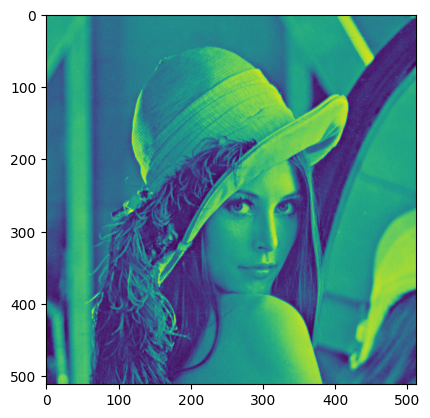

In [193]:
#import input image
image_original = cv2.imread(path, cv2.IMREAD_COLOR)
#convert to gray color
image_gray = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)
#show input
plt.imshow(image_gray)

##Memanggil Fungsi Sobel

In [194]:
s,sx,sy = fsobel(image_gray)

##Menampilkan filter Horisontal

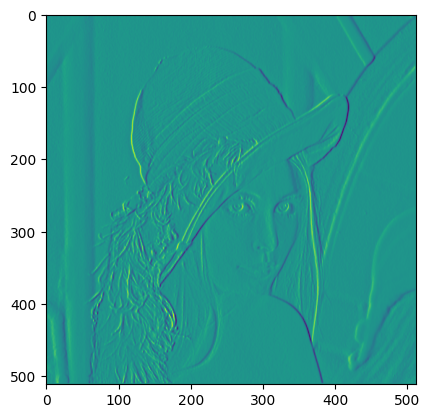

In [195]:
#output x-derivative and y-derivatiive
plt.imshow(sx)

##Menampilkan Filter Vertikal

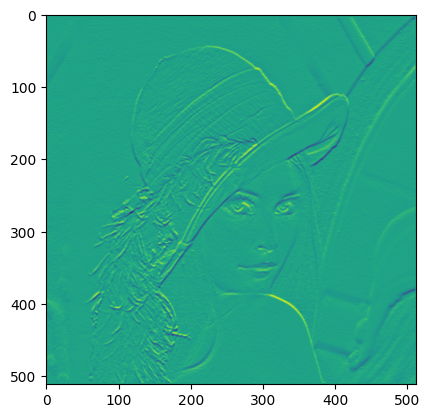

In [196]:
plt.imshow(sy)

##Shows The Combination Horizontal and Vertical

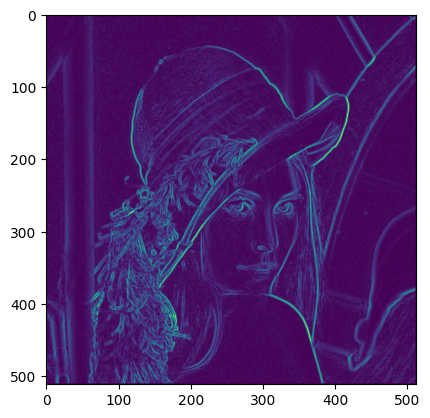

In [197]:
plt.imshow(s)

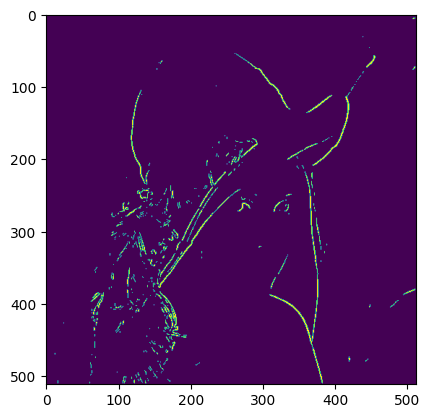

In [198]:
#use a threshold value 
ret1,th1 = cv2.threshold(s,100,255,cv2.THRESH_BINARY)
#out[ut final image]
plt.imshow(th1)

#PREWIT

In [199]:
def fprewit(image_gray):
  [rows, columns] = np.shape(image_gray)
  #create output image only with zero same size as input image
  prewit_filtered_image = np.zeros(shape=(rows, columns))
  #same for x derivative and y derivative
  prewit_filtered_x = np.zeros(shape=(rows, columns))
  prewit_filtered_y = np.zeros(shape=(rows, columns))

  #prewit kernel
  prewit_y = np.array([[1, 1, 1], 
                    [0, 0, 0], 
                    [-1, -1, -1]])

  prewit_x = np.array([[1, 0, -1], 
                    [1, 0, -1], 
                    [1, 0, -1]])
  
  #OPERASI KONVOLUSI MULAI DARI SINI
  for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(prewit_x, image_gray[i:i + 3, j:j + 3]))     #get x derivative
        prewit_filtered_x[i+1,j+1]=gx                                        #store x derivative
        gy = np.sum(np.multiply(prewit_y, image_gray[i:i + 3, j:j + 3]))     #get y derivative
        prewit_filtered_y[i+1,j+1]=gy                                        #store y derivative
        prewit_filtered_image[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)     #find the megnitude
   # OPERASI KONVOLUSI SAMPAI DISINI

  #normalize / scale the image 0 to 255
  cv2.normalize(prewit_filtered_x, prewit_filtered_x, 0, 255, cv2.NORM_MINMAX)
  cv2.normalize(prewit_filtered_y, prewit_filtered_y, 0, 255, cv2.NORM_MINMAX)
  cv2.normalize(prewit_filtered_image, prewit_filtered_image, 0, 255, cv2.NORM_MINMAX)
        
  #round up and type cast to int from float
  prewit_filtered_x = np.round(prewit_filtered_x).astype(np.uint8)
  prewit_filtered_y = np.round(prewit_filtered_y).astype(np.uint8)
  prewit_filtered_image = np.round(prewit_filtered_image).astype(np.uint8)
  return(prewit_filtered_image,prewit_filtered_x,prewit_filtered_y)

##Read and Show the Original GrayScale Image

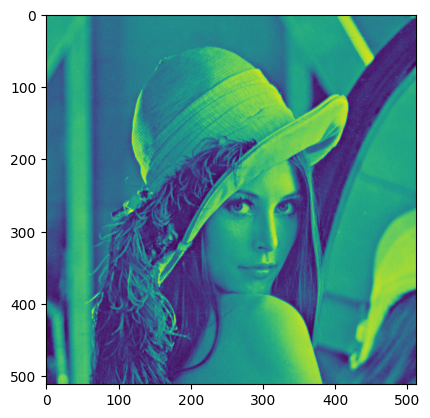

In [200]:
#import input image
image_original = cv2.imread(path, cv2.IMREAD_COLOR)
#convert to gray color
image_gray = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)
#show input
plt.imshow(image_gray)

##Memanggil Fungsi prewit

In [201]:
p,px,py = fprewit(image_gray)

##Menampilkan filter Horisontal

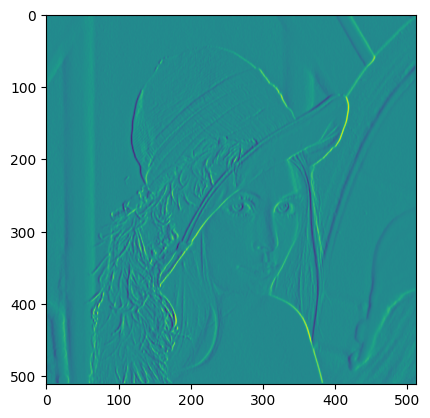

In [202]:
#output x-derivative and y-derivatiive
plt.imshow(px)

##Menampilkan Filter Vertikal

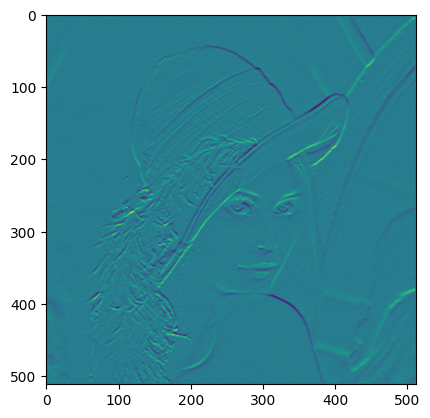

In [203]:
plt.imshow(py)

##Shows The Combination Horizontal and Vertical

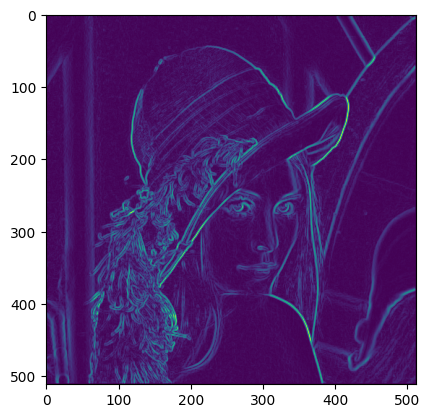

In [204]:
plt.imshow(p)

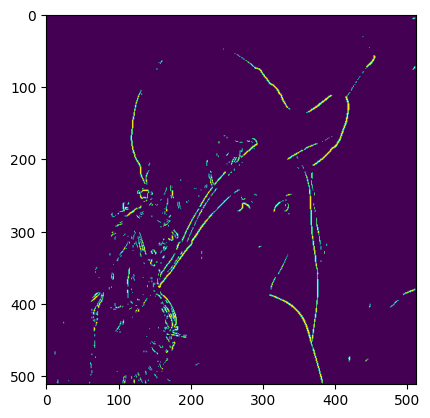

In [205]:
#use a threshold value 
ret2,th2 = cv2.threshold(p,100,255,cv2.THRESH_BINARY)
#out[ut final image]
plt.imshow(th2)

#Laplacian 1

In [206]:
def flaplacian1(image_gray):
  [rows, columns] = np.shape(image_gray)
  #create output image only with zero same size as input image
  laplacian1_filtered_image = np.zeros(shape=(rows, columns))
  #same for x derivative and y derivative
  laplacian1_filtered_x = np.zeros(shape=(rows, columns))
  laplacian1_filtered_y = np.zeros(shape=(rows, columns))

  #laplacian1 kernel
  laplacian1_y = np.array([[0,-1,0], 
                    [-1, 4, -1], 
                    [0, -1, 0]])

  laplacian1_x = laplacian1_y
  
  #OPERASI KONVOLUSI MULAI DARI SINI
  for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(laplacian1_x, image_gray[i:i + 3, j:j + 3]))     #get x derivative
        laplacian1_filtered_x[i+1,j+1]=gx                                        #store x derivative
        gy = np.sum(np.multiply(laplacian1_y, image_gray[i:i + 3, j:j + 3]))     #get y derivative
        laplacian1_filtered_y[i+1,j+1]=gy                                        #store y derivative
        laplacian1_filtered_image[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)     #find the megnitude
   # OPERASI KONVOLUSI SAMPAI DISINI

  #normalize / scale the image 0 to 255
  cv2.normalize(laplacian1_filtered_x, laplacian1_filtered_x, 0, 255, cv2.NORM_MINMAX)
  cv2.normalize(laplacian1_filtered_y, laplacian1_filtered_y, 0, 255, cv2.NORM_MINMAX)
  cv2.normalize(laplacian1_filtered_image, laplacian1_filtered_image, 0, 255, cv2.NORM_MINMAX)
        
  #round up and type cast to int from float
  laplacian1_filtered_x = np.round(laplacian1_filtered_x).astype(np.uint8)
  laplacian1_filtered_y = np.round(laplacian1_filtered_y).astype(np.uint8)
  laplacian1_filtered_image = np.round(laplacian1_filtered_image).astype(np.uint8)
  return(laplacian1_filtered_image,laplacian1_filtered_x,laplacian1_filtered_y)

##Read and Show the Original GrayScale Image

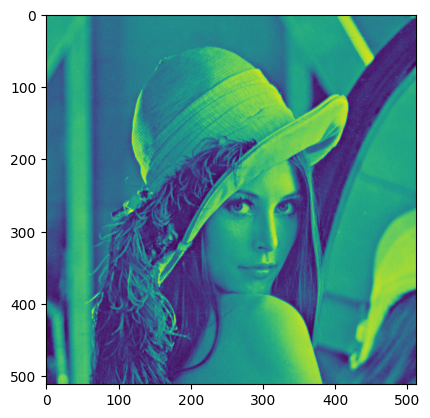

In [207]:
#import input image
image_original = cv2.imread(path, cv2.IMREAD_COLOR)
#convert to gray color
image_gray = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)
#show input
plt.imshow(image_gray)

##Memanggil Fungsi laplacian1

In [208]:
l1,l1x,l1y = flaplacian1(image_gray)

##Menampilkan filter Horisontal

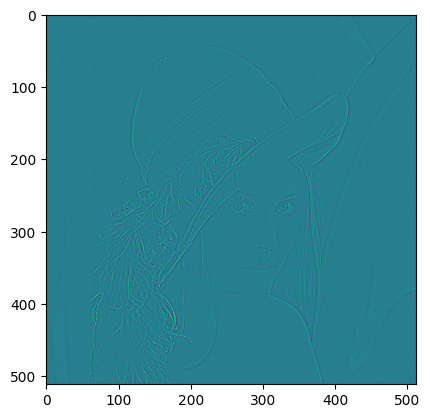

In [209]:
#output x-derivative and y-derivatiive
plt.imshow(l1x)

##Menampilkan Filter Vertikal

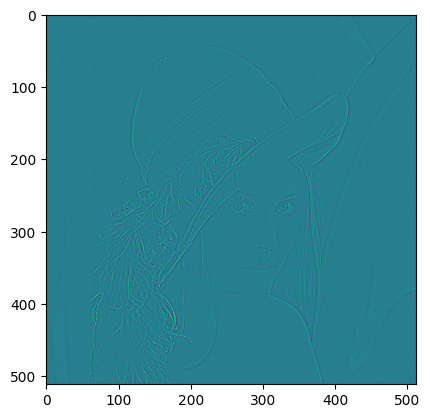

In [210]:
plt.imshow(l1y)

##Shows The Combination Horizontal and Vertical

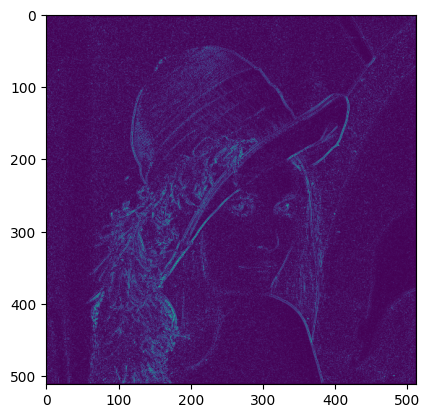

In [211]:
plt.imshow(l1)

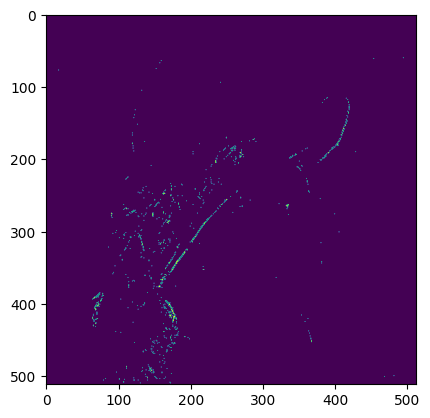

In [212]:
#use a threshold value 
ret3,th3 = cv2.threshold(l1,100,255,cv2.THRESH_BINARY)
#out[ut final image]
plt.imshow(th3)

#Laplacian 2

In [213]:
def flaplacian2(image_gray):
  [rows, columns] = np.shape(image_gray)
  #create output image only with zero same size as input image
  laplacian2_filtered_image = np.zeros(shape=(rows, columns))
  #same for x derivative and y derivative
  laplacian2_filtered_x = np.zeros(shape=(rows, columns))
  laplacian2_filtered_y = np.zeros(shape=(rows, columns))

  #laplacian2 kernel
  laplacian2_y = np.array([[-1,-1,-1], 
                    [-1, 8, -1], 
                    [-1, -1, -1]])

  laplacian2_x = laplacian2_y
  
  #OPERASI KONVOLUSI MULAI DARI SINI
  for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(laplacian2_x, image_gray[i:i + 3, j:j + 3]))     #get x derivative
        laplacian2_filtered_x[i+1,j+1]=gx                                        #store x derivative
        gy = np.sum(np.multiply(laplacian2_y, image_gray[i:i + 3, j:j + 3]))     #get y derivative
        laplacian2_filtered_y[i+1,j+1]=gy                                        #store y derivative
        laplacian2_filtered_image[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)     #find the megnitude
   # OPERASI KONVOLUSI SAMPAI DISINI

  #normalize / scale the image 0 to 255
  cv2.normalize(laplacian2_filtered_x, laplacian2_filtered_x, 0, 255, cv2.NORM_MINMAX)
  cv2.normalize(laplacian2_filtered_y, laplacian2_filtered_y, 0, 255, cv2.NORM_MINMAX)
  cv2.normalize(laplacian2_filtered_image, laplacian2_filtered_image, 0, 255, cv2.NORM_MINMAX)
        
  #round up and type cast to int from float
  laplacian2_filtered_x = np.round(laplacian2_filtered_x).astype(np.uint8)
  laplacian2_filtered_y = np.round(laplacian2_filtered_y).astype(np.uint8)
  laplacian2_filtered_image = np.round(laplacian2_filtered_image).astype(np.uint8)
  return(laplacian2_filtered_image,laplacian2_filtered_x,laplacian2_filtered_y)

##Read and Show the Original GrayScale Image

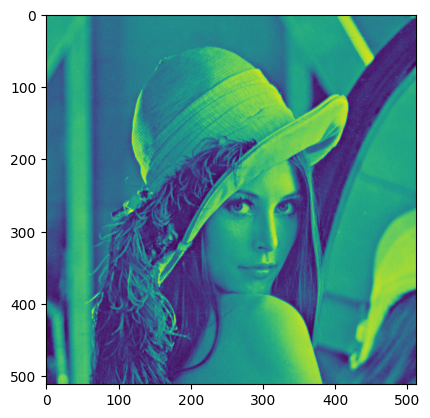

In [214]:
#import input image
image_original = cv2.imread(path, cv2.IMREAD_COLOR)
#convert to gray color
image_gray = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)
#show input
plt.imshow(image_gray)

##Memanggil Fungsi laplacian2

In [215]:
l2,l2x,l2y = flaplacian2(image_gray)

##Menampilkan filter Horisontal

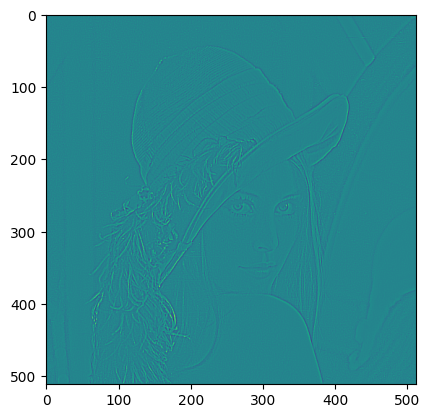

In [216]:
#output x-derivative and y-derivatiive
plt.imshow(l2x)

##Menampilkan Filter Vertikal

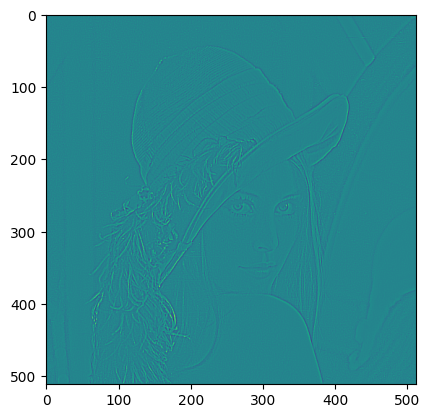

In [217]:
plt.imshow(l2y)

##Shows The Combination Horizontal and Vertical

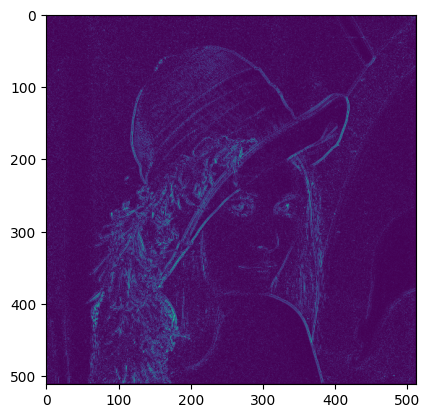

In [218]:
plt.imshow(l2)

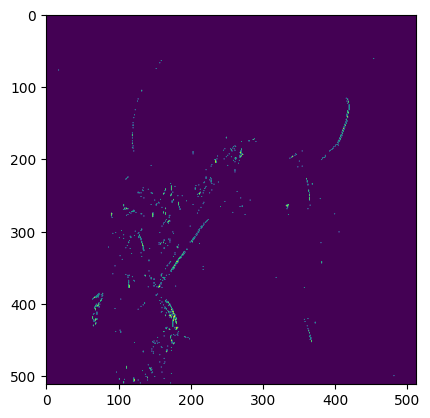

In [219]:
#use a threshold value 
ret4,th4 = cv2.threshold(l2,100,255,cv2.THRESH_BINARY)
#out[ut final image]
plt.imshow(th4)

#COMPARE

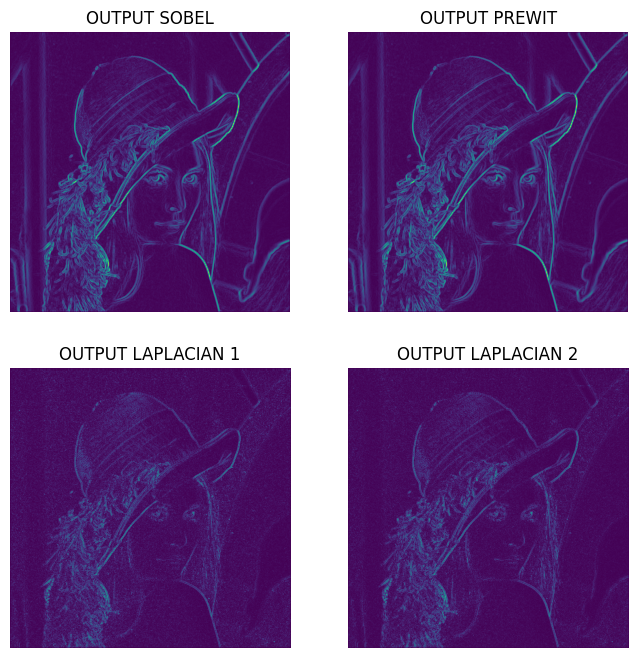

In [220]:
fig = plt.figure(figsize=(8,8))

ax1 = fig.add_subplot(221)
plt.imshow(s)
plt.axis('off')
plt.title('OUTPUT SOBEL')

ax2 = fig.add_subplot(222)
plt.imshow(p)
plt.axis('off')
plt.title('OUTPUT PREWIT')

ax3 = fig.add_subplot(223)
plt.imshow(l1)
plt.axis('off')
plt.title('OUTPUT LAPLACIAN 1')

ax4 = fig.add_subplot(224)
plt.axis('off')
plt.imshow(l2)
plt.title('OUTPUT LAPLACIAN 2')

plt.show()

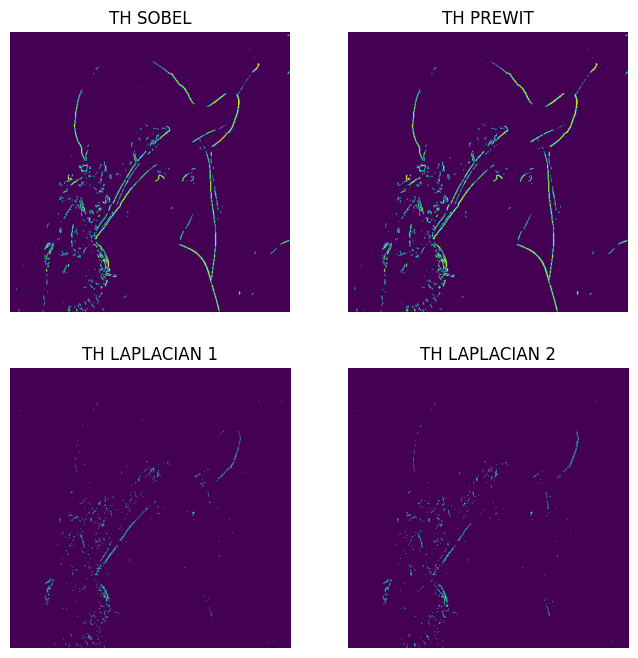

In [221]:
fig = plt.figure(figsize=(8,8))

ax1 = fig.add_subplot(221)
plt.imshow(th1)
plt.axis('off')
plt.title('TH SOBEL')

ax2 = fig.add_subplot(222)
plt.imshow(th2)
plt.axis('off')
plt.title('TH PREWIT')

ax3 = fig.add_subplot(223)
plt.imshow(th3)
plt.axis('off')
plt.title('TH LAPLACIAN 1')

ax4 = fig.add_subplot(224)
plt.axis('off')
plt.imshow(th4)
plt.title('TH LAPLACIAN 2')

plt.show()